# Volume Weighted Average Price (VWAP)

https://www.investopedia.com/terms/v/vwap.asp

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data
import yfinance as yf
yf.pdr_override()

In [ ]:
# input
symbol = 'AAPL'
start = '2023-01-01'
end = '2023-09-01'

# Read data
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538666,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488876,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069321,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597061,70790800


In [ ]:
def VWAP(df):
    return (df['Adj Close'] * df['Volume']).sum() / df['Volume'].sum()

In [ ]:
n = 14
df['VWAP'] = pd.concat([(pd.Series(VWAP(df.iloc[i:i+n]), index=[df.index[i+n]])) for i in range(len(df)-n)])

In [ ]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,VWAP
Date,,,,,,,
2023-01-24,140.309998,143.160004,140.300003,142.529999,141.924484,66435100,131.419221
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.257339,65799300,132.872317
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.348419,54105100,134.066705
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.310043,70555800,135.396172
2023-01-30,144.960007,145.550003,142.850006,143.000000,142.392502,64015300,136.725557


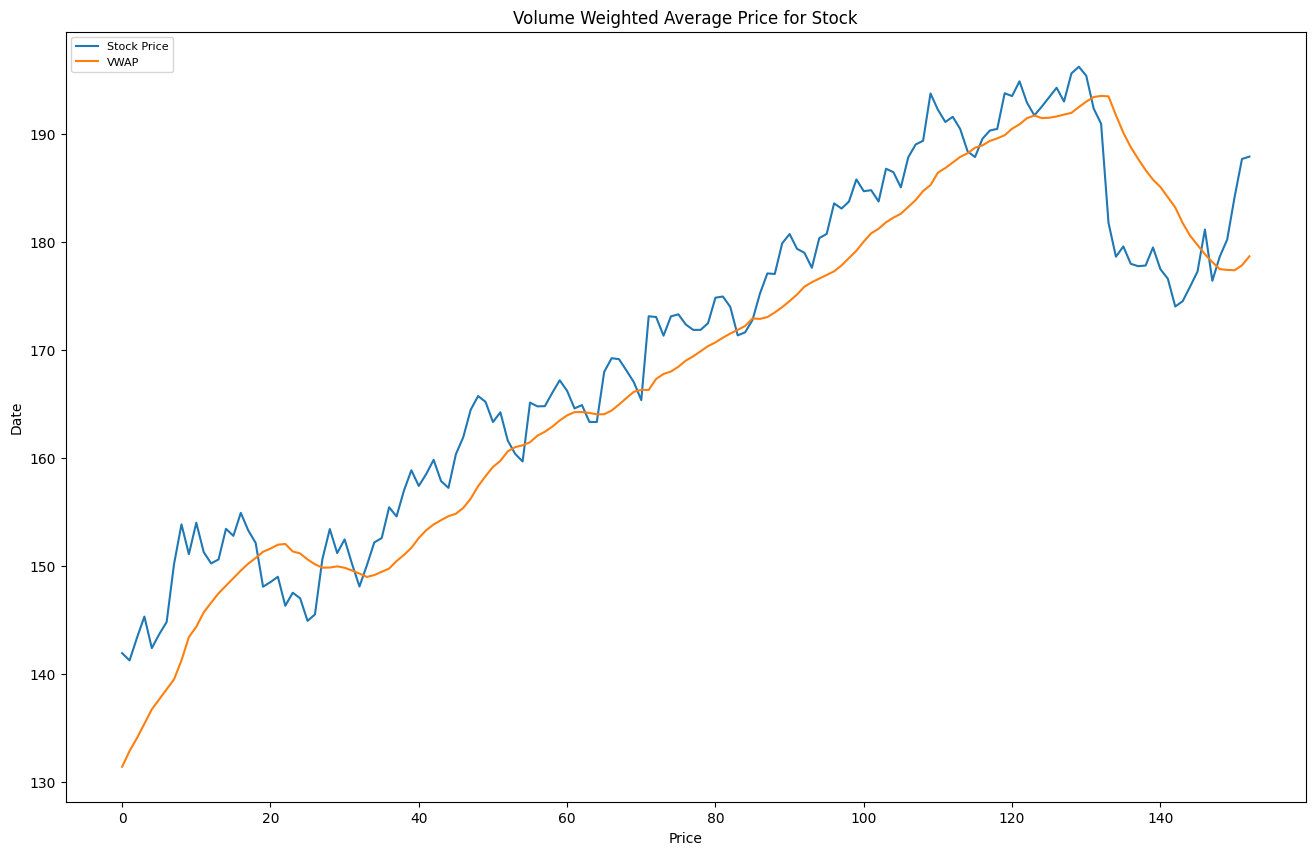

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['VWAP'])
plt.title('Volume Weighted Average Price for Stock')
plt.legend(
           ('Stock Price', 'VWAP'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=8)
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()

## Candlestick with VWAP

In [ ]:
from matplotlib import dates as mdates
import datetime as dt


df['VolumePositive'] = df['Open'] < df['Adj Close']
df = df.dropna()
df = df.reset_index()
df['Date'] = mdates.date2num(df['Date'].astype(dt.date))
df.head()

TypeError: ignored

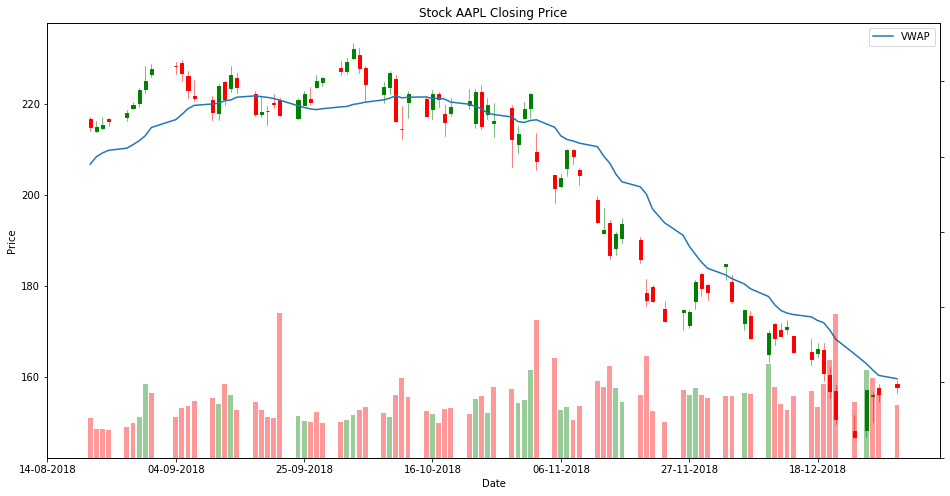

In [ ]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['VWAP'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')